In [2]:
import os
import sys
import json
import itertools

import json
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['figure.constrained_layout.use'] = True

In [3]:
colors = {
        'ColgeIM': 'darkorchid',
        'A': 'darkorchid',
        'B': 'darkorchid',
        'C': 'deeppink',
        'D': 'olive',
        'E': 'teal',
        'F': 'darkorange',
        'G': 'purple',
        'H': 'royalblue',
        'I': 'orangered',
        'J': 'dodgerblue',
        'K': 'chocolate',
        'L': 'turquoise',
        'M': 'green',
        'N': 'black',
        'O': 'red',
        'P': 'cyan',
        'Q': 'teal',
        'R': 'cyan',
        'S': 'turquoise',
        'T': 'slateblue',
}

In [4]:
def convert_labels(labels):
    for i, label in enumerate(labels):
        if label == '500K':
            labels[i] = '0.5M'
        if label == '1000K':
            labels[i] = '1M'
    return labels

In [22]:
data_root = "../data/run_data/Feb13/sacred"


# graph_info.json is available in each folder
with open(os.path.join('../data/run_data/graph_info', 'graph_info.json')) as f:
    # key: graph name
    # value: graph node size
    graph_info = json.load(f)


runs = [3, 4, 5, 6]
colge_im_graph_info = {}
colge_im_config = {}
colge_im_raw = {}
colge_im = {}


for r in runs:
    with open(os.path.join(data_root, str(r), 'graph_info.json')) as f:
        colge_im_graph_info[r] = json.load(f)

for r in runs:
    with open(os.path.join(data_root, str(r), 'eval_episode_rewards.json')) as f:
        colge_im_raw[r] = json.load(f)

for r in runs:
    with open(os.path.join(data_root, str(r), 'config.json')) as f:
        colge_im_config[r] = json.load(f)

for r in runs:
    key = list(colge_im_raw[r].keys())[0]
    print(np.array(colge_im_raw[r][key]).shape)


for r in runs:
    key = list(colge_im_raw[r].keys())
    print(key)
    

for r in runs:
    colge_im[r] = {}
    graphs = list(colge_im_raw[r].keys())
    print(f'r: {r}, graphs: {graphs}')
    
    for graph in graphs:
        print(np.array(colge_im_raw[r][graph]).shape)
        colge_im[r][graph] = {}
        colge_im[r][graph]['mean_std'] = (np.mean(colge_im_raw[r][graph], axis=1), np.std(colge_im_raw[r][graph], axis=1))
        colge_im[r][graph]['normalized'] = np.array(colge_im_raw[r][graph]) / float(colge_im_graph_info[r][graph])
        
        pivot = int(np.ceil(2000 / colge_im_config[r]['T'] / colge_im_config[r]['save_every']))
        print(f'----> {pivot}')
        colge_im[r][graph]['normalized_stable_epsilon'] = colge_im[r][graph]['normalized'][pivot:, :]
        max_step = pivot * colge_im_config[r]['T'] * colge_im_config[r]['save_every']
        
    for graph in graphs:
        colge_im[r]['cat_norm'] = np.mean(np.concatenate([colge_im[r][graph]['normalized'] for graph in graphs], axis=1), axis=1)
        

(161, 20)
(163, 20)
(163, 20)
(163, 20)
['20', '21', '22', '23', '24']
['50', '51', '52', '53', '54']
['100', '101', '102', '103', '104']
['200', '201', '202', '203', '204']
r: 3, graphs: ['20', '21', '22', '23', '24']
(161, 20)
----> 21
(161, 20)
----> 21
(161, 20)
----> 21
(161, 20)
----> 21
(161, 20)
----> 21
r: 4, graphs: ['50', '51', '52', '53', '54']
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
r: 5, graphs: ['100', '101', '102', '103', '104']
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
r: 6, graphs: ['200', '201', '202', '203', '204']
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21
(163, 20)
----> 21


In [20]:
print(colge_im_config[1]['T'])
print(colge_im_config[1]['epislon_decay_steps'])

9
12000


In [23]:
np.array(colge_im_raw[3]['21']).shape

(161, 20)

In [17]:
colge_im[3]['cat_norm'].shape

(161,)

In [20]:
colge_im[3]['21']['normalized_stable_epsilon'].shape

(140, 20)

In [7]:
def plot_algo(ax, algo_name, algo_label, algo_mean, algo_std, lw, alpha=0.3):
    ax.plot(range(len(algo_mean)), algo_mean, label=algo_label, lw=lw, color=colors[algo_name])
    ax.fill_between(range(len(algo_mean)), 
                    algo_mean+algo_std, 
                    algo_mean-algo_std,
                    facecolor=colors[algo_name], 
                    alpha=alpha)

In [8]:
def plot_figures(graphs, runs, data, plot_legend=True):
    fig = plt.figure()
    lw = 1
    # fig.subplots_adjust(hspace=0.4, wspace=0.4)
    col = 5   # graph name
    nrows = 5  # runs
    alpha_shade = 0.18

    fig, axes = plt.subplots(nrows=nrows, ncols=col, figsize=(25,20))
    for i in range(nrows):
        for j in range(col):
            if col == 1:
                ax = axes
            else:
                if nrows == 1:
                    ax = axes[j]
                else:
                    ax = axes[i][j]
            idx = i*col+j
            
            graph_name = graphs[idx]
            
            print(f'{"-"*10} plotting {graph_name}, index: {idx} {"-"*10}')
            
            mean, std = data[runs[i]][graph_name]

            plot_algo(ax, algo_name='ColgeIM', algo_label='ColgeIM', algo_mean=mean, algo_std=std, lw=lw, alpha=0.3)
            
            #ax.set_ylim([0, 1.05])

            if idx < 22:
                handles, labels = ax.get_legend_handles_labels()

            if i == 1:
                ax.set_xlabel('Steps', fontsize=12)
            if j == 0:
                ax.set_ylabel('Rewards', fontsize=12)

            #ax.set_xlabel('Training Steps', fontsize=7)
            #ax.set_ylabel('Mean Test Won Rate', fontsize=7)
            #ax.legend(fontsize=10, frameon=True, loc='upper left', facecolor='white', framealpha=0.9, edgecolor='white')
            
            ax.spines['right'].set_visible(True)
            ax.spines['top'].set_visible(True)
            ax.grid(color='grey', ls = ':', lw=0.5)

            #ax.spines['right'].set_color((.5,.5,.5))
            #ax.spines['top'].set_color((.9,.9,.9))

            default_xticks_range = 50
            pivot_len = len(mean) + 5
            if pivot_len > 200:
                default_xticks_range = 50
                xlabels = ['{}'.format(x if int(x)!= x else int(x)) + ('M' if x !=0 else '') 
                       for x in np.array(range(0, pivot_len, default_xticks_range))/100.]
            else:
                default_xticks_range = 50
                if 50 <= pivot_len <= 110:
                    default_xticks_range = 20
                    if pivot_len > 100:
                        default_xticks_range = 20
                    xlabels = ['{}'.format(x if int(x)!= x else int(x)) + ('0K' if x !=0 else '') 
                           for x in np.array(range(0, pivot_len, default_xticks_range))]     
                else:
                    xlabels = ['{}'.format(x if int(x)!= x else int(x)) + ('M' if x !=0 else '') 
                           for x in np.array(range(0, pivot_len, default_xticks_range))/100.]

            #print(xlabels)
            #ax.set_xticks(np.array(range(0, pivot_len, default_xticks_range)))
            #ax.set_xticklabels(convert_labels(xlabels))

            #ax.set_yticks([0, 25, 50, 75, 100])
            #print(ax.get_xticks())

            ax.xaxis.set_tick_params(labelsize=10)
            ax.yaxis.set_tick_params(labelsize=10)
            if plot_legend and idx == 0:
                legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=12, ncol=12, frameon=False)
                # legend = ax.legend(fontsize=6, frameon=False)
                for line in legend.get_lines():
                    line.set_linewidth(3)
            ax.set_title(f'graph name: {graph_name}', fontsize=12)
    
    os.makedirs('./images', exist_ok=True)
    plt.savefig(f'./images/demo.pdf', bbox_inches='tight')

---------- plotting 20, index: 0 ----------
---------- plotting 21, index: 1 ----------
---------- plotting 22, index: 2 ----------
---------- plotting 23, index: 3 ----------
---------- plotting 24, index: 4 ----------
---------- plotting 50, index: 5 ----------
---------- plotting 51, index: 6 ----------
---------- plotting 52, index: 7 ----------
---------- plotting 53, index: 8 ----------
---------- plotting 54, index: 9 ----------
---------- plotting 100, index: 10 ----------
---------- plotting 101, index: 11 ----------
---------- plotting 102, index: 12 ----------
---------- plotting 103, index: 13 ----------
---------- plotting 104, index: 14 ----------
---------- plotting 200, index: 15 ----------
---------- plotting 201, index: 16 ----------
---------- plotting 202, index: 17 ----------
---------- plotting 203, index: 18 ----------
---------- plotting 204, index: 19 ----------
---------- plotting 500, index: 20 ----------
---------- plotting 501, index: 21 ----------
--------

<Figure size 1800x1200 with 0 Axes>

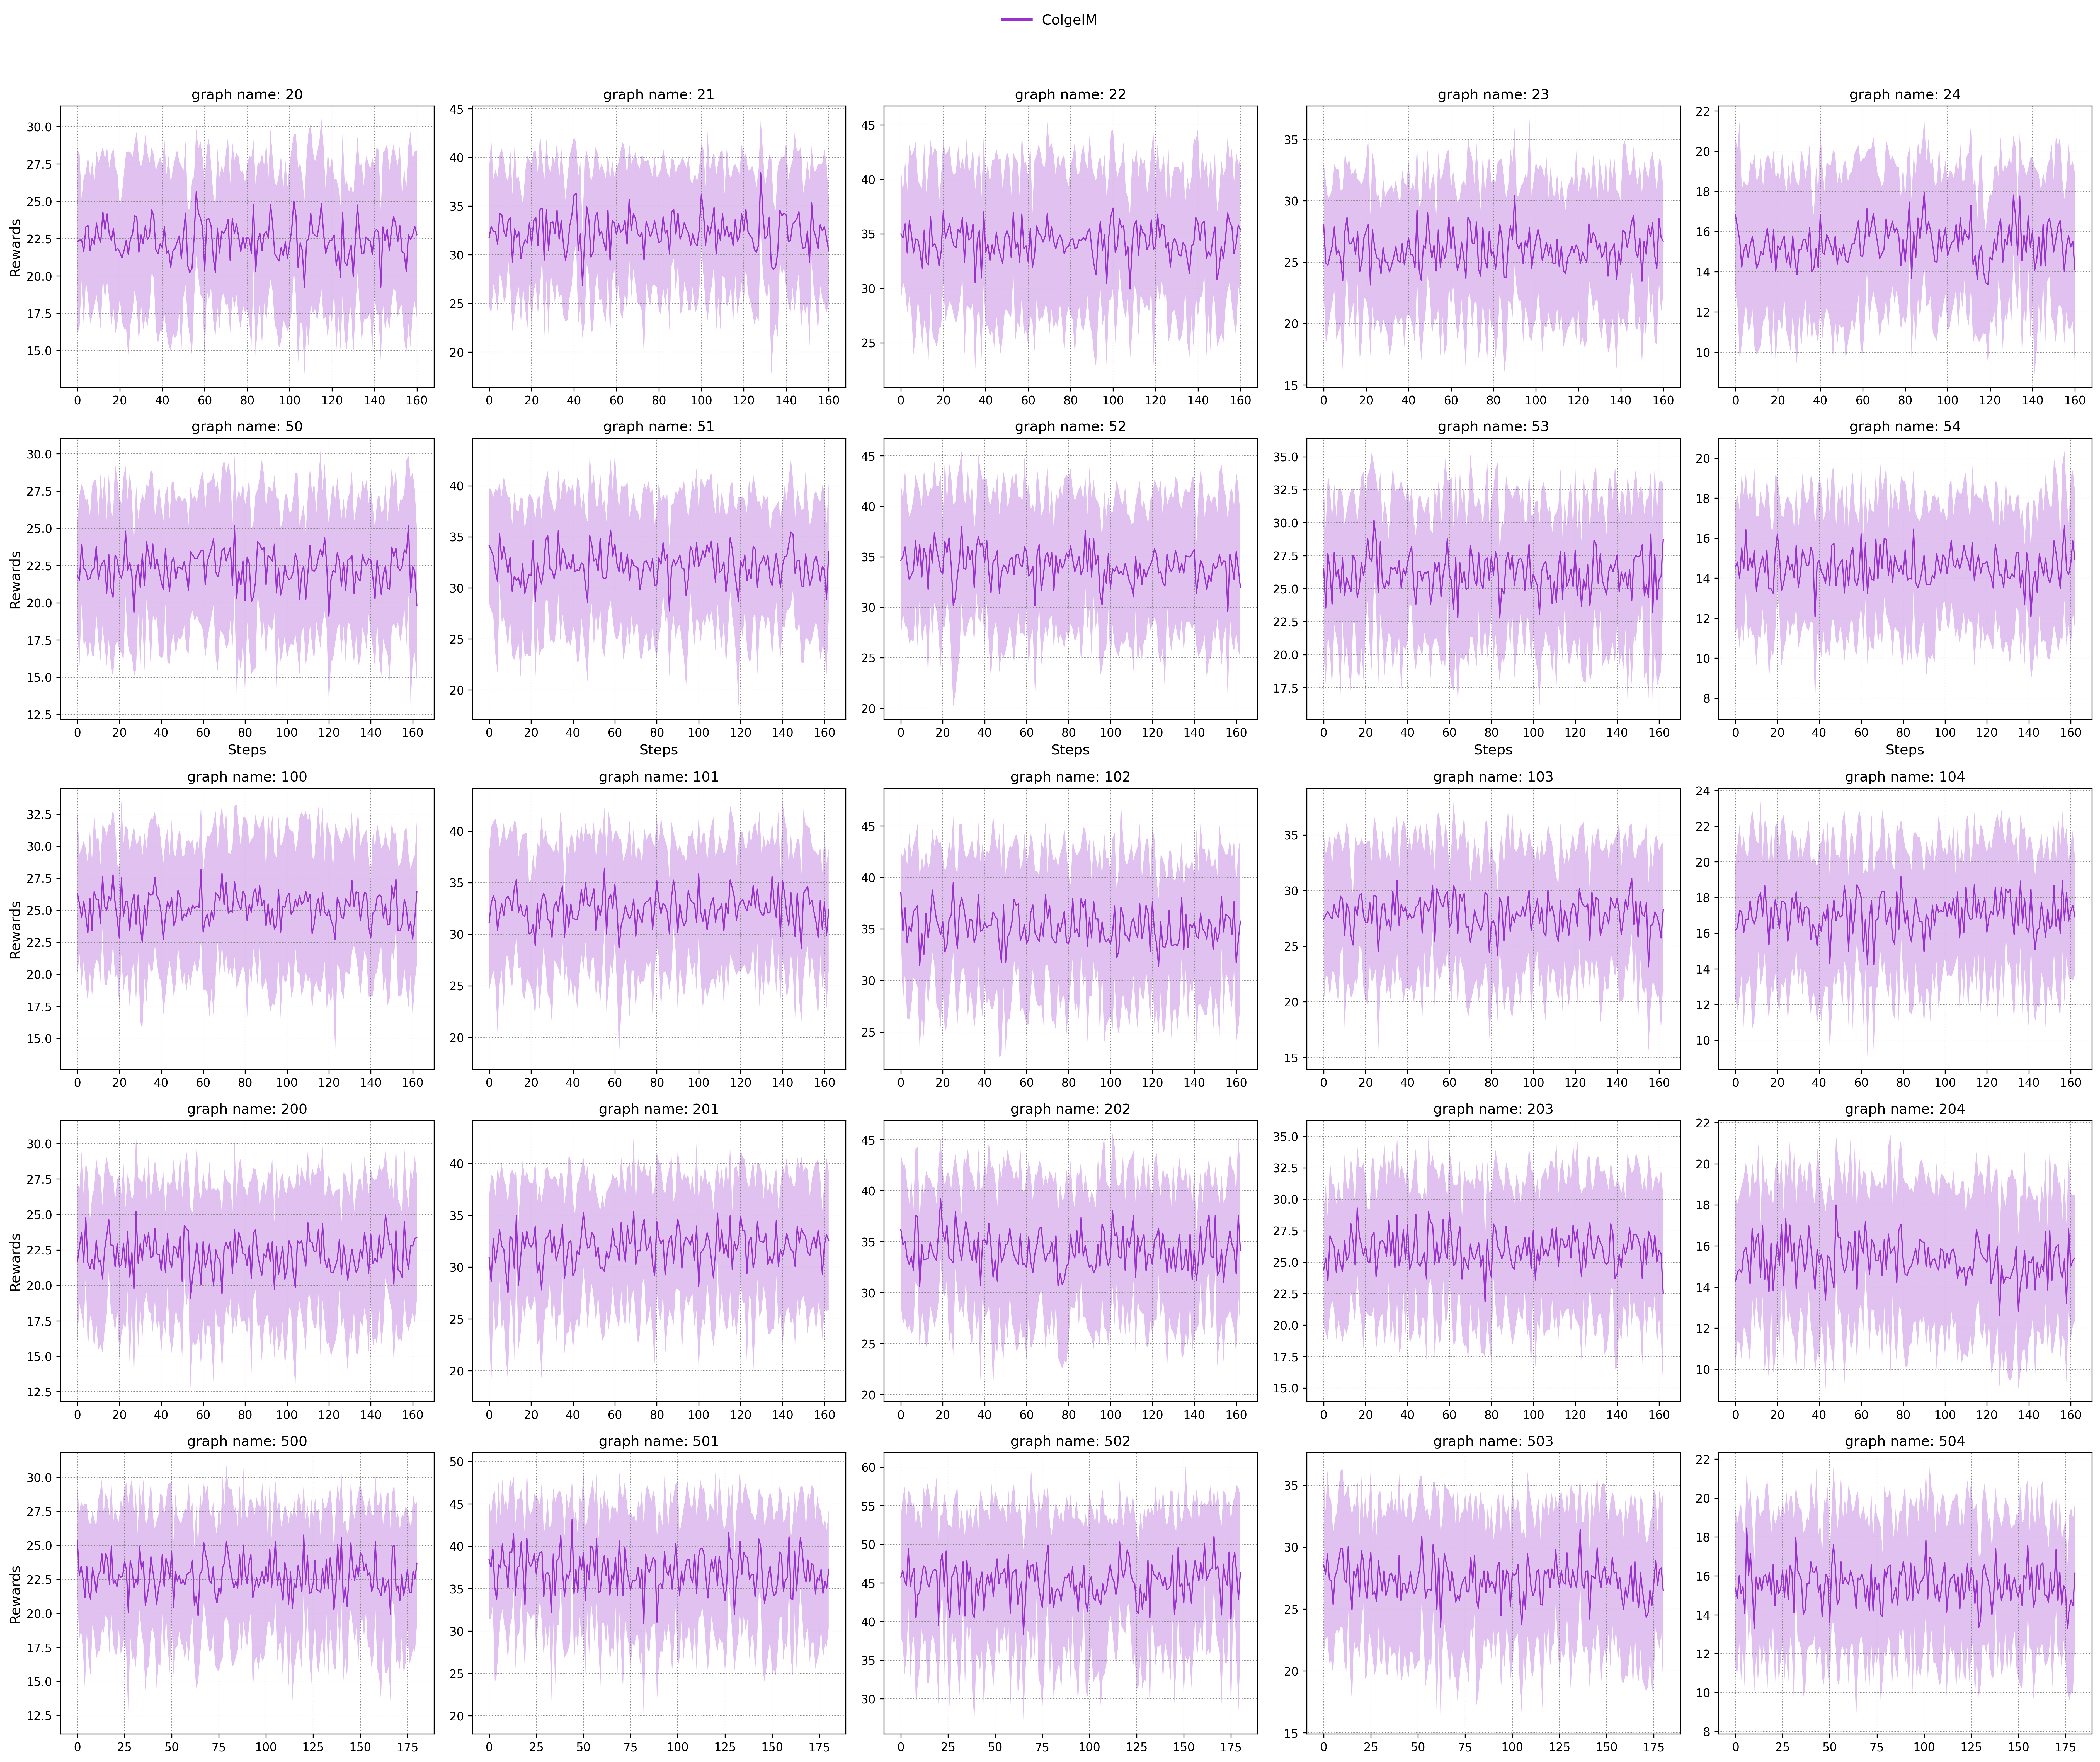

In [9]:
graphs = list(itertools.chain(*[list(colge_im[r].keys()) for r in runs]))
plot_figures(graphs, runs, colge_im, plot_legend=True)